In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.svm import LinearSVC


In [84]:
data = pd.read_csv('Thyroid_Diff.csv', sep = ',')


In [3]:
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [5]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:

fig = px.bar(data, x = 'Risk', y = 'Age', color= 'Recurred', 
             hover_data=['Pathology'], height= 500, 
             title = 'Recuperação por Risco',
             labels={'Age': 'Idade','Pathology': 'Patologia'}, 
            #  attern_shape='Risk', 
             text_auto= True)
fig.show()



In [8]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [9]:
scatter3d = px.scatter_3d(data, x = 'Pathology', y = 'Stage', 
                          z = 'Risk',symbol = 'Recurred', animation_frame='Smoking',
                          color = 'Gender',
                          width=800,
                          height = 700,
                          opacity= 0.5
                          )
scatter3d.show()

In [10]:
stri = px.strip(data, x = 'Age', y = 'Recurred', color='Gender', facet_col='Pathology')
stri.show()

In [11]:
stri2 = px.strip(data, x = 'Age', y = 'Risk', color='Recurred', 
                 facet_col='Focality')
stri2.show()

In [12]:
px.bar(data, x = 'Focality', y = 'Age', color ='Recurred', facet_col='Risk')

In [85]:
# Para fazer o grafico de correlação entre os dados primeiro
# preciso transformar os dados em inteiros

label = LabelEncoder()
for coluna in data:
    data[coluna + ' ' + 'Incoder'] = label.fit_transform(data[coluna])

data = data.select_dtypes('int')
data = data.drop('Age Incoder', axis = 1)




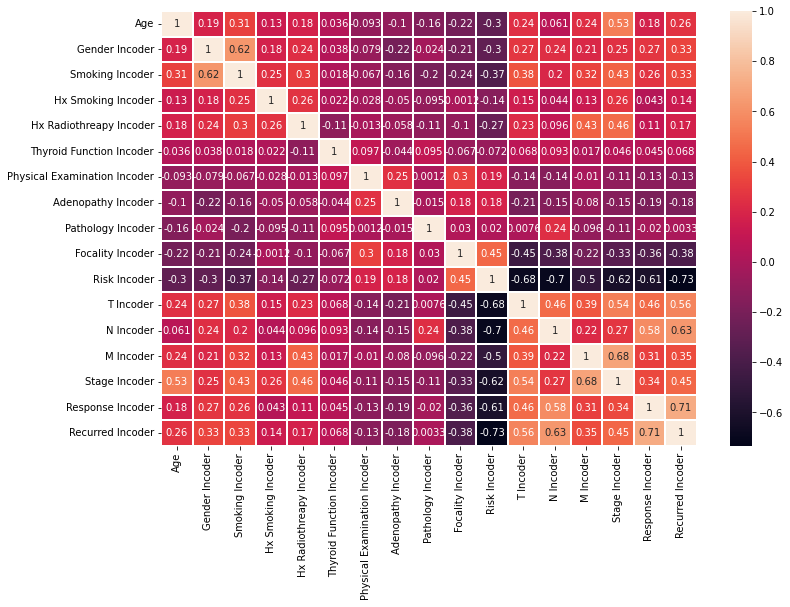

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.heatmap(data.corr(), annot = True, linewidths = 2)
plt.show()

In [14]:
y = data['Recurred Incoder']
X = data.drop('Recurred Incoder', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier()


# Testando o knn primeiro com os dados sem escalonalos
knn_params = {
    'n_neighbors': [2,3,4,5,6,7,8],
    'leaf_size': [30,60,90,120,150],
    'p': [1,2,3,4],
    'n_jobs': [None,2,4,6],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_params, cv = 5, verbose=1)
grid_knn.fit(x_train, y_train)


Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [30, 60, 90, 120, 150],
                         'n_jobs': [None, 2, 4, 6],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [16]:
logic = LogisticRegression(random_state=42)

params_logisc = {'penalty': ['None', 'l2', 'l1', 'elasticnet'],
                 'C': [0.5, 0.7, 0.9, 1],
                 'max_iter': [1000,30000,2000,20000],
                 'verbose': [0,1,2,3]
                 }

grid_logic = GridSearchCV(logic, param_grid= params_logisc, cv=5, verbose = 1)
grid_logic.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.5, 0.7, 0.9, 1],
                         'max_iter': [1000, 30000, 2000, 20000],
                         'penalty': ['None', 'l2', 'l1', 'elasticnet'],
                         'verbose': [0, 1, 2, 3]},
             verbose=1)

In [17]:
standar = StandardScaler()
scalar = standar.fit_transform(x_train)


In [18]:
knn_scalar_grid = grid_knn.fit(scalar, y_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


In [19]:
svm = LinearSVC(random_state=42)

svm_params = {'max_iter': [500,1000,1500,2000],
              'verbose': [0,1,2,3],
              'intercept_scaling': [1,3,4,6,8,10,12],
              'penalty': ['l1', 'l2']
              }

svm_grid = GridSearchCV(svm, param_grid = svm_params, verbose = 1, cv = 6)
svm_grid.fit(scalar, y_train)

Fitting 6 folds for each of 224 candidates, totalling 1344 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][

GridSearchCV(cv=6, estimator=LinearSVC(random_state=42),
             param_grid={'intercept_scaling': [1, 3, 4, 6, 8, 10, 12],
                         'max_iter': [500, 1000, 1500, 2000],
                         'penalty': ['l1', 'l2'], 'verbose': [0, 1, 2, 3]},
             verbose=1)

In [ ]:
random_forest = RandomForestClassifier()
random_params = {'n_estimators': [500],
                 'random_state': [42,84,128,200],
                 'criterion': ['gine', 'entropy', 'log_loss'],
                 'n_jobs': [1,3,4,5],
                 'verbose': [1,2,3]
                 }


random_cv = GridSearchCV(random_forest, param_grid= random_params, verbose=1, cv = 4)
random_cv.fit(x_train, y_train)

In [24]:
# Printando as melhores pontuações dos meus modelos
print(grid_logic.best_score_)
print()
print(svm_grid.best_score_)
print()
print(random_cv.best_score_)
print()
print(grid_knn.best_score_)
print()
print(knn_scalar_grid.best_score_)


0.8953964194373402

0.8982657793910062

0.9563953488372092

0.918542199488491

0.918542199488491


In [25]:
gnb = GaussianNB()
gaussian = gnb.fit(x_train, y_train)
gaussian.score(x_train, y_train)

0.9040697674418605

In [47]:
# Fazendo a previsão dos meus meus modelos com seus melhores parâmetros
y_pred_svm = svm_grid.best_estimator_.predict(standar.fit_transform(x_test))
y_pred_gnb = gaussian.predict(x_test)
y_pred_forest = random_cv.best_estimator_.predict(x_test)
y_pred_logistc = grid_logic.best_estimator_.predict(x_test)
y_pred_knn = grid_knn.best_estimator_.predict(x_test)
y_pred_knn_scalar = knn_scalar_grid.best_estimator_.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


In [48]:
from sklearn.metrics import  classification_report

print('-'*25, 'SVM','-'*25)
print(classification_report(y_test, y_pred_svm, target_names = ['Não Recuperado', 'Recuperado']))
print()

print('-'*25, 'Gausian','-'*25)
print(classification_report(y_test, y_pred_gnb, target_names = ['Não Recuperado', 'Recuperado']))
print()

print('-'*25, 'Floresta','-'*25)
print(classification_report(y_test, y_pred_forest, target_names = ['Não Recuperado', 'Recuperado']))
print()

print('-'*25, 'Regressão Logistica','-'*25)
print(classification_report(y_test, y_pred_logistc, target_names = ['Não Recuperado', 'Recuperado']))
print()

print('-'*25, 'KNN','-'*25)
print(classification_report(y_test, y_pred_knn, target_names = ['Não Recuperado', 'Recuperado']))
print()

print('-'*25, 'KNN - Escalonado','-'*25)
print(classification_report(y_test, y_pred_knn_scalar, target_names = ['Não Recuperado', 'Recuperado']))

------------------------- SVM -------------------------
                precision    recall  f1-score   support

Não Recuperado       0.90      0.96      0.93        28
    Recuperado       0.89      0.73      0.80        11

      accuracy                           0.90        39
     macro avg       0.89      0.85      0.87        39
  weighted avg       0.90      0.90      0.89        39


------------------------- Gausian -------------------------
                precision    recall  f1-score   support

Não Recuperado       0.87      0.96      0.92        28
    Recuperado       0.88      0.64      0.74        11

      accuracy                           0.87        39
     macro avg       0.87      0.80      0.83        39
  weighted avg       0.87      0.87      0.86        39


------------------------- Floresta -------------------------
                precision    recall  f1-score   support

Não Recuperado       1.00      1.00      1.00        28
    Recuperado       1.00     

In [68]:
forest_score = random_cv.best_estimator_.predict_proba(x_test)[:,1]
gaussian_score = gaussian.predict_proba(x_test)[:,1]
logistc_score = grid_logic.predict_proba(x_test)[:,1]
knn_score = grid_knn.best_estimator_.predict_proba(x_test)[:,1]
svm_score = svm_grid.best_estimator_.predict(x_test)
knn_score_scalar = knn_scalar_grid.best_estimator_.predict_proba(x_test)[:,1]





[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,auc

# Criando a função para plotar a curva de roc
def plota_curva_roc(y_true, y_score, titulo: None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    au = auc(fpr, tpr)
    fig = px.area(
        x = fpr,
        y = tpr,
        title = titulo,
        labels = dict(x = 'False Positive Rate', y = 'True Positive Rate'),
        width = 700, height = 500
    )
    fig.add_shape(
        type = 'line', line=dict(dash = 'dash'),
        x0 = 0, x1 =1, y0 =0,  y1 =1
    )

    fig.update_yaxes(scaleanchor = 'x', scaleratio=1)
    fig.update_xaxes(constrain ='domain')
    return fig.show()

curva_knn = plota_curva_roc(y_test, knn_score, 'Curva de ROC KNN')
curva_svm = plota_curva_roc(y_test, svm_score, 'Curva de ROC SVM')
curva_knn_scalar = plota_curva_roc(y_test, knn_score_scalar, 'Curva de ROC KNN Scalar')
curva_floresta = plota_curva_roc(y_test, forest_score, 'Curva ROC Floresta')
curva_lr = plota_curva_roc(y_test, logistc_score, 'Curva de ROC LR')
curva_gaussian = plota_curva_roc(y_test, gaussian_score, 'Curva de ROC Gaussian')


Após toda análise e treinamento realizado os módelos que melhor desempenharam 
foram o de  regressão losgistica e floresta aleatoria, mas o que teve uma médida 
harmonica melhor foi o de floresta aleatoria.